In [1]:
from graph_tool.centrality import betweenness, closeness
from numpy import NaN
import pandas as pd
from graph_tool.all import *
from graph_tool.clustering import *

In [2]:
df = pd.read_csv("soc-sign-bitcoinotc.csv")
print(df.head())

    6   2  4  1289241911.72836
0   6   5  2      1.289242e+09
1   1  15  1      1.289243e+09
2   4   3  7      1.289245e+09
3  13  16  8      1.289254e+09
4  13  10  8      1.289254e+09


In [21]:
g = Graph(directed=True)
g.vp['name'] = g.new_vp('string')
g.ep['weight'] = g.new_ep('int')
g.ep['timestamp'] = g.new_ep('float')
nodes = set()

for i,row in df.iterrows():
    a,b,c,d = row
    nodes.add(a)
    nodes.add(b)
for n in nodes:
    v = g.add_vertex()
    g.vp['name'][v] = n
nodes = list(nodes)
for i,row in df.iterrows():
    a,b,c,d = row
    s = nodes.index(a)
    t = nodes.index(b)
    vs = g.vertex(s)
    vt = g.vertex(t)
    e = g.add_edge(vs, vt)
    g.ep['weight'][e] = c
    g.ep['timestamp'][e] = d
print("Vertex count:",g.num_vertices())
print("Edge count:",g.num_edges())

Vertex count: 5881
Edge count: 35591


In [24]:
a = closeness(g).get_array()
c_x = [0,0]
for v,ct in enumerate(a):
    if c_x[0] < ct and ct != NaN:
        c_x[0] = ct
        c_x[1] = v
print("max closeness centrality vertex",c_x[1],"with value: ",c_x[0])

b = betweenness(g)[0].get_array()
b_x = [0,0]
for v,bt in enumerate(b):
    if b_x[0] < bt and bt != NaN:
        b_x[0] = bt
        b_x[1] = v
print("max betweenness centrality vertex",b_x[1],"with value: ",b_x[0])

cc = global_clustering(g)
print("Global clustering coefficient:",cc[0],"with std:",cc[1])

max closeness centrality vertex 655 with value:  1.0
max betweenness centrality vertex 26 with value:  0.14210976035626377
Global clustering coefficient: 0.06030661970574365 with std: 0.012994993273758842


Most significant subgraph:


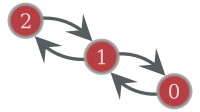

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f119006a910, at 0x7f11173f1580>

In [26]:
f = motifs(g,k=3)
ind = f[1].index(max(f[1]))
print("Most significant subgraph:")
graph_draw(f[0][ind], vertex_text=f[0][ind].vertex_index,output_size=(100, 100))
